In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense, Dropout
from keras.models import Model,Sequential

https://arxiv.org/pdf/1809.10717.pdf

In [62]:
DATA_DIR = '/Users/chenpete/Documents/Data/rare_events/'
df = pd.read_csv(DATA_DIR + 'paper_mill_rare_events.csv')
df['time'] = pd.to_datetime(df['time'])

In [63]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


## Lots of class imbalance (rare events)

In [64]:
df['y'].value_counts()

0    18274
1      124
Name: y, dtype: int64

## Scale datasets with both standard and minmax scaler

In [117]:
non_scale_cols = ['time','y']
param_cols = [
        'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60'
]
sc_std = StandardScaler()
df_scaled_std = pd.DataFrame(data = sc_std.fit_transform(df[param_cols]),columns=param_cols)
df_scaled_std = pd.concat([df[non_scale_cols],df_scaled_std],axis=1)

sc_minmax = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(data = sc_minmax.fit_transform(df[param_cols]),columns=param_cols)
df_scaled_minmax = pd.concat([df[non_scale_cols],df_scaled_minmax],axis=1)

### Plot standard scaled

In [118]:
%%capture
for col in param_cols:
    plt.figure(figsize=(10,5))
    plt.plot(df_scaled_std['time'],df_scaled_std[col])
    for time in list(df_scaled_std[df_scaled_std['y']==1]['time']):
        plt.axvline(time,color='red',linewidth=.2)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.xlim(['1999-04-30','1999-05-30'])
    plt.savefig(DATA_DIR +'plots/std_scaled_{}.png'.format(col))

## Plot Min Max

In [120]:
%%capture
for col in param_cols:
    plt.figure(figsize=(10,5))
    plt.plot(df_scaled_minmax['time'],df_scaled_minmax[col])
    for time in list(df_scaled_minmax[df_scaled_minmax['y']==1]['time']):
        plt.axvline(time,color='red',linewidth=.2)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.xlim(['1999-04-30','1999-05-30'])
    plt.savefig(DATA_DIR +'plots/minmax_scaled_{}.png'.format(col))

In [197]:
X_nominal_std = df_scaled_std[df_scaled_std['y'] == 0][param_cols]
X_event_std = df_scaled_std[df_scaled_std['y'] == 1][param_cols]

X_nominal_minmax = df_scaled_minmax[df_scaled_minmax['y'] == 0][param_cols]
X_event_minmax = df_scaled_minmax[df_scaled_minmax['y'] == 1][param_cols]


y_nominal = df_scaled_std[df_scaled_std['y'] == 0]['y']
y_event = df_scaled_std[df_scaled_std['y'] == 1]['y']

In [141]:
df_nominal_std.shape

(18274, 62)

In [142]:
df_event_std.shape

(124, 62)

In [143]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_nominal_std, y_nominal_std, test_size=0.2, random_state=0)

In [196]:
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_nominal_minmax, y_nominal_minmax, test_size=0.2, random_state=0)

NameError: name 'X_nominal_minmax' is not defined

In [144]:
X_test.shape

(3655, 59)

In [145]:
X_test = X_test.append(X_event)
y_test =y_test.append(y_event)

In [146]:
X_test.shape

(3779, 59)

In [147]:
y_test.shape

(3779,)

In [124]:
def simple_ann_autoencoder_regression():
    model = Sequential()
    model.add(Dense(units = 32,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = len(param_cols),activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

def simple_ann_autoencoder_classification():
    model = Sequential()
    model.add(Dense(units = 32,activation='relu',input_shape = (len(param_cols),)))
    model.add(Dense(units = len(param_cols),activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy',)
    return model

In [163]:
def results_df(X_true,X_pred,y_test):
    residual = X_pred - X_true
    residual_avg = np.mean(residual,axis=1)
    df = pd.DataFrame(data = {'residual_avg':residual_avg,'y':y_test})
    return df

def plot_results_hist(df_results):
    plt.figure()
    sns.distplot(df_results[df_results['y']==1]['residual_avg'],norm_hist=True)
    sns.distplot(df_results[df_results['y']==0]['residual_avg'],norm_hist=True)
    plt.legend(['event_residuals_avg','nominal_residuals_avg'])
    plt.title('distribution of average residuals')
    
def plot_results_violin(df_results):
    plt.figure()
    sns.violinplot(x='y',y='residual_avg',data=df_results)

# Model 1: Layer autoencoder - standard scaler (regression

In [125]:
model1 = simple_ann_autoencoder_regression()
model1.summary()

In [127]:
history_callback1 = model1.fit(X_train,X_train,epochs=100,batch_size = 12)
loss_history1 = history_callback1.history['loss']

Epoch 1/100
14619/14619 [==============================] - 1s 56us/step - loss: 0.0390
Epoch 2/100
14619/14619 [==============================] - 1s 50us/step - loss: 0.0386
Epoch 3/100
14619/14619 [==============================] - 1s 50us/step - loss: 0.0386
Epoch 4/100
14619/14619 [==============================] - 1s 50us/step - loss: 0.0383
Epoch 5/100
14619/14619 [==============================] - 1s 50us/step - loss: 0.0384
Epoch 6/100
14619/14619 [==============================] - 1s 51us/step - loss: 0.0385
Epoch 7/100
14619/14619 [==============================] - 1s 52us/step - loss: 0.0383
Epoch 8/100
14619/14619 [==============================] - 1s 51us/step - loss: 0.0383
Epoch 9/100
14619/14619 [==============================] - 1s 51us/step - loss: 0.0385
Epoch 10/100
14619/14619 [==============================] - 1s 51us/step - loss: 0.0387
Epoch 11/100
14619/14619 [==============================] - 1s 51us/step - loss: 0.0385
Epoch 12/100
14619/14619 [===============

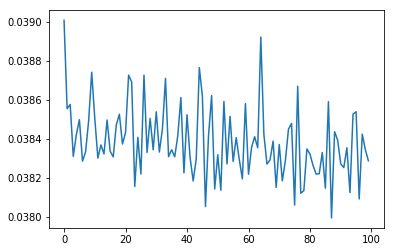

In [128]:
plt.plot(loss_history1)

In [160]:
X_pred1 = model1.predict(X_test)

In [162]:
df_results1 = results_df(X_test,X_pred1,y_test)

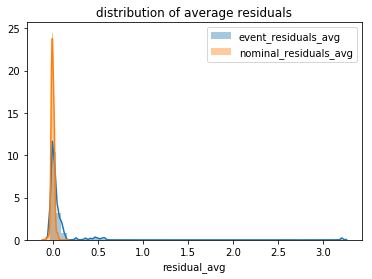

In [164]:
plot_results_hist(df_results1)

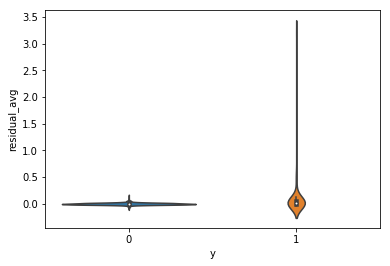

In [165]:
plot_results_violin(df_results1)

# Model 2: Layer autoencoder - minmax scaler (regression

In [166]:
model2 = simple_ann_autoencoder_classification()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                1920      
_________________________________________________________________
dense_6 (Dense)              (None, 59)                1947      
Total params: 3,867
Trainable params: 3,867
Non-trainable params: 0
_________________________________________________________________


In [167]:
history_callback2 = model2.fit(X_train,X_train,epochs=100,batch_size = 12)
loss_history2 = history_callback2.history['loss']

Epoch 1/100
14619/14619 [==============================] - 1s 71us/step - loss: -3.2378
Epoch 2/100
14619/14619 [==============================] - 1s 59us/step - loss: -4.8900
Epoch 3/100
14619/14619 [==============================] - 1s 60us/step - loss: -5.2063
Epoch 4/100
14619/14619 [==============================] - 1s 58us/step - loss: -5.3631
Epoch 5/100
14619/14619 [==============================] - 1s 58us/step - loss: -5.4546
Epoch 6/100
14619/14619 [==============================] - 1s 59us/step - loss: -5.5113
Epoch 7/100
14619/14619 [==============================] - 1s 58us/step - loss: -5.5506
Epoch 8/100
14619/14619 [==============================] - 1s 59us/step - loss: -5.5799
Epoch 9/100
14619/14619 [==============================] - 1s 60us/step - loss: -5.6036
Epoch 10/100
14619/14619 [==============================] - 1s 60us/step - loss: -5.6238
Epoch 11/100
14619/14619 [==============================] - 1s 61us/step - loss: -5.6430
Epoch 12/100
14619/14619 [====

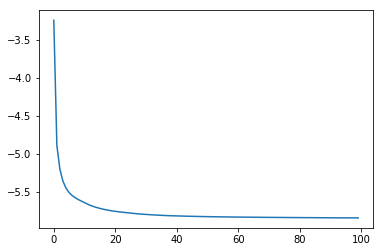

In [169]:
plt.plot(loss_history2)

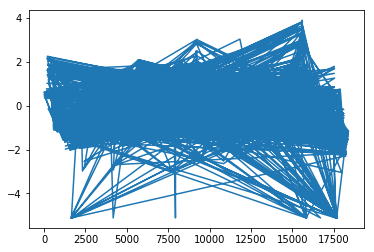

In [189]:
plt.plot(X_test_.iloc[:,0])

In [194]:
df_results2

NameError: name 'df_results' is not defined

In [171]:
X_pred2 = model2.predict(X_test)

In [172]:
df_results2 = results_df(X_test,X_pred2,y_test)

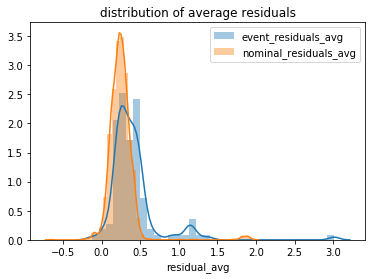

In [174]:
plot_results_hist(df_results2)

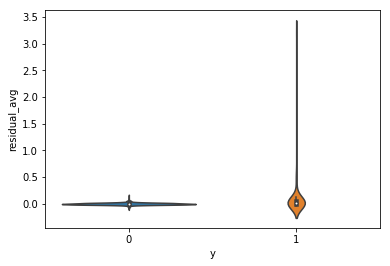

In [165]:
plot_results_violin(df_results1)